<a href="https://colab.research.google.com/github/ubadaht/StochasticGeneSimulations/blob/main/StochasticGeneSimulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

System we are producning

*   Reaction 1: 0 -> X,  K1 = 1 min^-1
*   Reaction 2: X -> 0, K2 = 0.1 min^-1








<a name='1.1'></a>


In [ ]:
def run(k1,k2, x0, t_sim, t_sampling):
"""
calculate activation func
a0 = sum(ai) sum of activation
r1, r2 U(0,1)
dt
sum(ai) > r2*a0
----> go back to 1
"""
  T = [0,]
  X = [X0,]

  while T[-1] < t_sim:
    a1 = k1 #prob 0
    a2 = k2+X[-1] #prob 1
    a0 = a1+ a2 #prob any
    r1, r2 = np.random.random_sample(2)
    dt = -np.log(r1)/a0
    if a1 > r2*a0:
      x_new = X[-1]+1
    else:
      x_new = X[-1]-1
    t+= dt
    if t> t_sampling


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def simulate_gene_expression(kr, gr, kp, gp, t_sim, r0, p0, t_sampling=10):
    T, R, P = [0], [r0], [p0]
    r, p, t = r0, p0, 0

    while T[-1] < t_sim:
        a1, a2, a3, a4 = kr, gr * r, kp * r, gp * p
        ## 0 -> R

        a0 = a1 + a2 + a3 + a4
        r1, r2 = np.random.random_sample(2)
        dt = -np.log(r1) / a0
        t += dt

        if t > t_sampling:
            if t > 2 * t_sampling:
                raise ValueError('ERROR')
            T.append(T[-1] + t_sampling)
            R.append(r)
            P.append(p)
            t = 0

        if r2 * a0 < a1:
            r += 1
        elif r2 * a0 < a1 + a2:
            r -= 1
        elif r2 * a0 < a1 + a2 + a3:
            r += 1
            p += 1
        else:
            p -= 1

    return T, R, P


In [ ]:
kr = 10.0
gr = 1.0
kp = 1.0
gp = 0.1
t_sim = 600  # Total simulation time (10 hours)
r0 = 0      # Initial mRNA concentration
p0 = 0      # Initial protein concentration

T, R, P = simulate_gene_expression(kr, gr, kp, gp, t_sim, r0, p0)

# Compute the equilibrium values (values at the end of the simulation)
Req = R[-1]
Peq = P[-1]

print(f"Equilibrium R value (Req): {Req}")
print(f"Equilibrium P value (Peq): {Peq}")

Equilibrium R value (Req): 11538
Equilibrium P value (Peq): 113080


In [ ]:
def run(kr, gr, kp, gp, t_sim, r0, p0, t_sampling=10):
    T, R, P = [0], [r0], [p0]
    r = r0
    p = p0
    t = 0

    while T[-1] < t_sim:
        a1 = kr  # 0 -> R
        a2 = gr * r  # R -> 0
        a3 = kp * r  # R -> R + P
        a4 = gp * p  # P -> 0
        a0 = a1 + a2 + a3 + a4

        r1, r2 = np.random.random_sample(2)
        dt = -np.log(r1) / a0
        t += dt

        if t > t_sampling:
            if t > 2 * t_sampling:
                raise ValueError('ERROR')
            T.append(T[-1] + t_sampling)
            R.append(r)
            P.append(p)
            t = 0

        if a1 > r2 * a0:
            r += 1  # 0 -> R
        elif (a1 + a2) > r2 * a0:
            r -= 1  # R -> 0
        elif (a1 + a2 + a3) > r2 * a0:
            p += 1  # R -> R + P
        else:
            p -= 1  # P -> 0

    return T, R, P

In [ ]:
kr = 10.0
gr = 1.0
kp = 1.0
gp = 0.1
t_sim = 600

In [ ]:
T, R, P = run(kr, gr, kp, gp, t_sim, 0, 0)
Req = R[-1]
Peq = P[-1]

print(f"Equilibrium R value (Req): {Req}")
print(f"Equilibrium P value (Peq): {Peq}")
#f = plt.figure()
#ax = f.add_subplot(2,1,1)
#ax.plot(T, R, 'o-')
#ax = f.add_subplot(2,1,2)
#ax.plot(T, P, 'o-')

Equilibrium R value (Req): 11
Equilibrium P value (Peq): 116


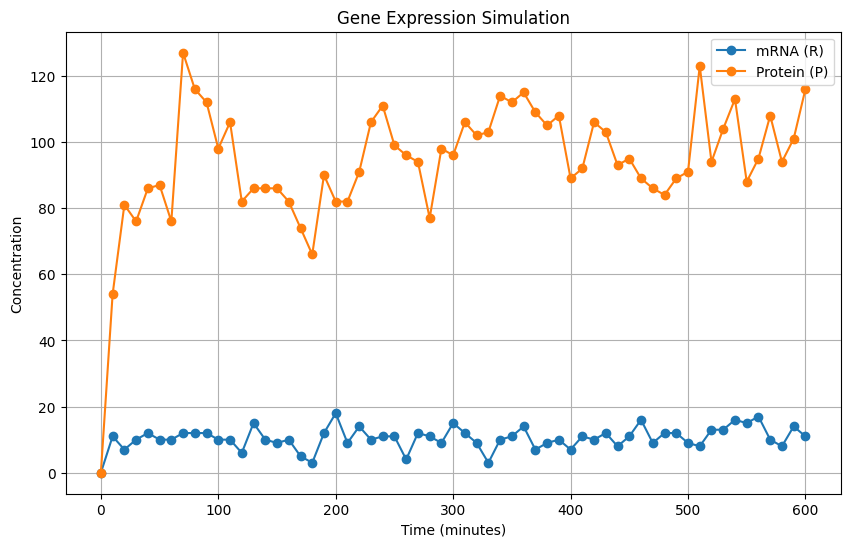

In [ ]:
# Plot the trajectories of mRNA and protein concentrations
plt.figure(figsize=(10, 6))
plt.plot(T, R, 'o-',label='mRNA (R)')
plt.plot(T, P, 'o-',label='Protein (P)')
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration')
plt.legend()
plt.title('Gene Expression Simulation')
plt.grid(True)
plt.show()

In [ ]:
# index where the second half starts
midpoint = len(T) // 2

# Slicing arrays to get the second half
R_second_half = R[midpoint:]
P_second_half = P[midpoint:]

# Calculating average of the second half
avg_R_second_half = np.mean(R_second_half)
avg_P_second_half = np.mean(P_second_half)

# Calculating the variance of the second half of R and P
variance_R_second_half = np.var(R_second_half)
variance_P_second_half = np.var(P_second_half)

# Calculating the Fano's Factor of the second half of R and P
fanoFactor_R_second_half = variance_R_second_half/ avg_R_second_half
fanoFactor_P_second_half = variance_P_second_half/ avg_P_second_half

print(f"starting T for second half: {midpoint}")
print(f"Average of R in the second half: {avg_R_second_half}")
print(f"Average of P in the second half: {avg_P_second_half}")

# Print the variances
print(f"Variance of R in the second half: {variance_R_second_half}")
print(f"Variance of P in the second half: {variance_P_second_half}")

# Print the Fano's Factors
print(f"Fano's Factor of R in the second half: {fanoFactor_R_second_half}")
print(f"Fano's Factor of P in the second half: {fanoFactor_P_second_half}")

starting T for second half: 30
Average of R in the second half: 11.03225806451613
Average of P in the second half: 100.74193548387096
Variance of R in the second half: 9.38605619146722
Variance of P in the second half: 101.22372528616025
Fano's Factor of R in the second half: 0.8507828711563854
Fano's Factor of P in the second half: 1.0047824155846838


Variance of R in the second half: 9.38605619146722
Variance of P in the second half: 101.22372528616025


Fano's Factor of R in the second half: 0.8507828711563854
Fano's Factor of P in the second half: 1.0047824155846838


In [ ]:
print(T)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600]


In [ ]:
def stats(kr, gr, kp, gp, t_sim, r0, p0, n_sims, t_sampling=10):
    n_samples = int(t_sim / t_sampling) + 1
    RR = np.zeros((n_sims, n_samples))
    PP = np.zeros((n_sims, n_samples))
    for i_sim in range(n_sims):
        T, R, P = simulate_gene_expression(kr, gr, kp, gp, t_sim, r0, p0, t_sampling)
        RR[i_sim, :] = R
        PP[i_sim, :] = P
    return T, np.mean(RR, axis=0), np.mean(PP, axis=0), np.var(RR, axis=0), np.var(PP, axis=0)

In [ ]:
kr = 10.0
gr = 1.0
kp = 1.0
gp = 0.1
t_sim = 600  # Total simulation time (10 hours)
r0 = 0      # Initial mRNA concentration
p0 = 0      # Initial protein concentration
n_sims = 100  # Number of simulations

# Call the stats function to run multiple simulations and collect statistics
T, avg_R, avg_P, var_R, var_P = stats(kr, gr, kp, gp, t_sim, r0, p0, n_sims)

KeyboardInterrupt: ignored

In [ ]:
print(f"Average R in the second half: {avg_R}")
print(f"Average P in the second half: {avg_P}")
print(f"Variance of R in the second half: {var_R}")
print(f"Variance of P in the second half: {var_P}")
print(f"Fano's factor of R in the second half: {fano_R}")
print(f"Fano's factor of P in the second half: {fano_P}")

In [ ]:
import numpy as np

# Function to calculate average, variance, and Fano's factor
def calculate_stats(data):
    avg = np.mean(data)
    var = np.var(data)
    fano = var / avg if avg > 0 else 0  # Handle potential division by zero
    return avg, var, fano

# Calculate the midpoint of the trajectory
midpoint = len(T) // 2

# Extract data from the second half of the trajectory
R_second_half = R[midpoint:]
P_second_half = P[midpoint:]

# Calculate statistics for R and P in the second half
avg_R, var_R, fano_R = calculate_stats(R_second_half)
avg_P, var_P, fano_P = calculate_stats(P_second_half)

# Print the results
print(f"Average R in the second half: {avg_R}")
print(f"Average P in the second half: {avg_P}")
print(f"Variance of R in the second half: {var_R}")
print(f"Variance of P in the second half: {var_P}")
print(f"Fano's factor of R in the second half: {fano_R}")
print(f"Fano's factor of P in the second half: {fano_P}")


Average R in the second half: 8338.322580645161
Average P in the second half: 81427.87096774194
Variance of R in the second half: 2525209.7669094694
Variance of P in the second half: 239736424.1123829
Fano's factor of R in the second half: 302.84385648151385
Fano's factor of P in the second half: 2944.1568502675905


In [ ]:
protein_target = 100
desired_fano_factor = 5
num_transcription_rates = 50
min_transcription_rate = 1.0
max_transcription_rate = 10.0

# array of possible transcription rates
transcription_rates = np.linspace(min_transcription_rate, max_transcription_rate, num_transcription_rates)

# Lists to store transcription rates, translation rates, and corresponding Fano factors
trans_rates = []
translation_rates = []
fano_factors = []

# Simulate for different transcription rates and find corresponding translation rates
for kr in transcription_rates:
    # Compute the corresponding translation rate to achieve the target protein level
    kp = protein_target / kr

    # Simulate gene expression with the calculated transcription and translation rates
    T, R, P = simulate_gene_expression(kr, 1.0, kp, 0.1, t_sim, 0, 0)

    # Calculate Fano factor for protein in the second half of the trajectory
    midpoint = len(T) // 2
    P_second_half = P[midpoint:]
    fano_factor = calculate_stats(P_second_half)

    # Store the results
    trans_rates.append(kr)
    translation_rates.append(kp)
    fano_factors.append(fano_factor)

# Plot Fano factor of P as a function of transcription rate
plt.figure(figsize=(10, 6))
plt.plot(trans_rates, fano_factors, marker='o', linestyle='-', color='b')
plt.xlabel('Transcription Rate')
plt.ylabel('Fano Factor of P')
plt.title('Fano Factor of Protein vs. Transcription Rate')
plt.grid(True)
plt.show()

# Find the transcription rate and translation rate that gives Fano's factor ≈ 5
target_fano_factor = 5
index = np.argmin(np.abs(np.array(fano_factors) - target_fano_factor))
optimal_kr = transcription_rates[index]
optimal_kp = translation_rates[index]

print(f"Transcription rate that gives Fano's factor ≈ 5: {optimal_kr}")
print(f"Corresponding Translation rate: {optimal_kp}")